
# **Running Pyspark in Colab**

To run spark in Colab, we need to first install all the dependencies in Colab environment i.e. Apache Spark 3.0.1 with hadoop 2.7, Java 8 and Findspark to locate the spark in the system. The tools installation can be carried out inside the Jupyter Notebook of the Colab. 

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

Now we have installed Spark and Java in Colab, it is time to set the environment path which enables us to run Pyspark in Colab environment. Set the location of Java and Spark by running the following code:

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

Run a local spark session to test installation:

In [ ]:
import findspark
findspark.init('/content/spark-3.0.1-bin-hadoop2.7')
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
# spark = SparkSession.builder.appName("Basics").getOrCreate()

Now colab is ready to run Pyspark. 

# **Load the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = '/content/drive/My Drive/AB_US_2020.csv'

In [ ]:
df = spark.read.csv(dataset,inferSchema=True, header =True)

In [ ]:
print(f'Shape of the dataset is {df.count():d} rows by {len(df.columns):d} columns.')

Shape of the dataset is 226724 rows by 17 columns.


In [ ]:
df.show(3)

+------+--------------------+-------+---------+-------------------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+---------+
|    id|                name|host_id|host_name|neighbourhood_group|neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|     city|
+------+--------------------+-------+---------+-------------------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+---------+
| 38585|Charming Victoria...| 165529|  Evelyne|               null|        28804|35.65146|-82.62792|   Private room|   60|             1|              138|   16/02/20|             1.14|                             1|               0|Asheville|
| 80905|    French Chic 

In [ ]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: string (nullable = true)
 |-- minimum_nights: string (nullable = true)
 |-- number_of_reviews: string (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: string (nullable = true)
 |-- calculated_host_listings_count: string (nullable = true)
 |-- availability_365: string (nullable = true)
 |-- city: string (nullable = true)



In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, TimestampType

In [ ]:
# Based on above printschema, data types are incorrect. Now we are creating our own schema 
DefinedSchema = [StructField('id', IntegerType(), True),
                 StructField('name', StringType(),True),
                 StructField('host_id', IntegerType(),True),
                 StructField('host_name', StringType(),True),
                 StructField('neighbourhood_group', StringType(),True),
                 StructField('neighbourhood', StringType(),True),
                 StructField('latitude', DoubleType(),True),
                 StructField('longitude', DoubleType(),True),
                 StructField('room_type', StringType(),True),
                 StructField('price', DoubleType(),True),
                 StructField('minimum_nights', IntegerType(), True),
                 StructField('number_of_reviews', DoubleType(),True),
                 StructField('last_review', TimestampType(),True),
                 StructField('reviews_per_month', DoubleType(),True),
                 StructField('calculated_host_listings_count', IntegerType(),True),
                 StructField('availability_365', IntegerType(),True),
                 StructField('city', StringType(),True)]

In [ ]:
DefinedSchema

[StructField(id,IntegerType,true),
 StructField(name,StringType,true),
 StructField(host_id,IntegerType,true),
 StructField(host_name,StringType,true),
 StructField(neighbourhood_group,StringType,true),
 StructField(neighbourhood,StringType,true),
 StructField(latitude,DoubleType,true),
 StructField(longitude,DoubleType,true),
 StructField(room_type,StringType,true),
 StructField(price,DoubleType,true),
 StructField(minimum_nights,IntegerType,true),
 StructField(number_of_reviews,DoubleType,true),
 StructField(last_review,TimestampType,true),
 StructField(reviews_per_month,DoubleType,true),
 StructField(calculated_host_listings_count,IntegerType,true),
 StructField(availability_365,IntegerType,true),
 StructField(city,StringType,true)]

In [ ]:
data_schema = StructType(fields=DefinedSchema)

In [ ]:
data_schema

StructType(List(StructField(id,IntegerType,true),StructField(name,StringType,true),StructField(host_id,IntegerType,true),StructField(host_name,StringType,true),StructField(neighbourhood_group,StringType,true),StructField(neighbourhood,StringType,true),StructField(latitude,DoubleType,true),StructField(longitude,DoubleType,true),StructField(room_type,StringType,true),StructField(price,DoubleType,true),StructField(minimum_nights,IntegerType,true),StructField(number_of_reviews,DoubleType,true),StructField(last_review,TimestampType,true),StructField(reviews_per_month,DoubleType,true),StructField(calculated_host_listings_count,IntegerType,true),StructField(availability_365,IntegerType,true),StructField(city,StringType,true)))

In [ ]:
df = spark.read.csv(dataset,schema=data_schema, header =True)

In [ ]:
# Now the data types are correct
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: double (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: double (nullable = true)
 |-- last_review: timestamp (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)
 |-- city: string (nullable = true)



In [ ]:
df.show()

+------+--------------------+--------+----------+-------------------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+---------+
|    id|                name| host_id| host_name|neighbourhood_group|neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|     city|
+------+--------------------+--------+----------+-------------------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+---------+
| 38585|Charming Victoria...|  165529|   Evelyne|               null|        28804|35.65146|-82.62792|   Private room| 60.0|             1|            138.0|       null|             1.14|                             1|               0|Asheville|
| 80905|    Fren

# Clean Data

In [ ]:
df.count()

226724

Clean the NA value in price, city and room type

In [ ]:
df = df.dropna(how='any', subset = ['price','city','room_type'])
df.count()

225373

Check number of null value in each column

In [ ]:
df.filter(df['id'].isNull()).count()

39

In [ ]:
df.filter(df['name'].isNull()).count()

25

In [ ]:
df.where(df['host_id'].isNull()).count()

32

In [ ]:
df.where(df['host_name'].isNull()).count()

33

In [ ]:
df.where(df['neighbourhood_group'].isNull()).count()

115516

In [ ]:
df.where(df['neighbourhood'].isNull()).count()

0

In [ ]:
df.where(df['latitude'].isNull()).count()

32

In [ ]:
df.where(df['longitude'].isNull()).count()

31

In [ ]:
df.where(df['minimum_nights'].isNull()).count()

32

In [ ]:
df.where(df['number_of_reviews'].isNull()).count()

3

In [ ]:
df.where(df['last_review'].isNull()).count()

225373

In [ ]:
df.where(df['reviews_per_month'].isNull()).count()

48499

In [ ]:
df.where(df['calculated_host_listings_count'].isNull()).count()

29

In [ ]:
df.where(df['availability_365'].isNull()).count()

32

Based on above number of null values, 'neighbourhood_group' and 'last_review' columns are going to be dropped. OTHER columns are going to be filled with values as follows: 

In [ ]:
df = df.drop('neighbourhood_group','last_review')

In [ ]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: double (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: double (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)
 |-- city: string (nullable = true)



In [ ]:
df.na.fill({'name':'unknown', 'host_name':'unknown'}).show()

+------+--------------------+--------+----------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+
|    id|                name| host_id| host_name|neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|
+------+--------------------+--------+----------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+
| 38585|Charming Victoria...|  165529|   Evelyne|        28804|35.65146|-82.62792|   Private room| 60.0|             1|            138.0|             1.14|                             1|               0|Asheville|
| 80905|    French Chic Loft|  427027|   Celeste|        28801|35.59779| -82.5554|Entire home/apt|470.0|             1|            114.0|       

In [ ]:
from pyspark.sql.functions import min
from pyspark.sql.functions import mean

In [ ]:
minValue_mn = df.select(min(df['minimum_nights'])).collect()

In [ ]:
min_mn =minValue_mn[0][0]

In [ ]:
df.na.fill(min_mn, ['minimum_nights']).show()

+------+--------------------+--------+----------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+
|    id|                name| host_id| host_name|neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|
+------+--------------------+--------+----------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+
| 38585|Charming Victoria...|  165529|   Evelyne|        28804|35.65146|-82.62792|   Private room| 60.0|             1|            138.0|             1.14|                             1|               0|Asheville|
| 80905|    French Chic Loft|  427027|   Celeste|        28801|35.59779| -82.5554|Entire home/apt|470.0|             1|            114.0|       

In [ ]:
meanValue_nr = df.select(mean(df['number_of_reviews'])).collect()

In [ ]:
mean_nr = meanValue_nr[0][0]

In [ ]:
df.na.fill(mean_nr, ['number_of_reviews']).show()

+------+--------------------+--------+----------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+
|    id|                name| host_id| host_name|neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|
+------+--------------------+--------+----------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+
| 38585|Charming Victoria...|  165529|   Evelyne|        28804|35.65146|-82.62792|   Private room| 60.0|             1|            138.0|             1.14|                             1|               0|Asheville|
| 80905|    French Chic Loft|  427027|   Celeste|        28801|35.59779| -82.5554|Entire home/apt|470.0|             1|            114.0|       

In [ ]:
# Doing all the rest in one line
df.na.fill(df.select(mean(df['reviews_per_month'])).collect()[0][0], ['reviews_per_month']).show()

+------+--------------------+--------+----------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+
|    id|                name| host_id| host_name|neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|
+------+--------------------+--------+----------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+
| 38585|Charming Victoria...|  165529|   Evelyne|        28804|35.65146|-82.62792|   Private room| 60.0|             1|            138.0|             1.14|                             1|               0|Asheville|
| 80905|    French Chic Loft|  427027|   Celeste|        28801|35.59779| -82.5554|Entire home/apt|470.0|             1|            114.0|       

In [ ]:
df.na.fill(df.select(mean(df['calculated_host_listings_count'])).collect()[0][0], ['calculated_host_listings_count']).show()

+------+--------------------+--------+----------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+
|    id|                name| host_id| host_name|neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|
+------+--------------------+--------+----------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+
| 38585|Charming Victoria...|  165529|   Evelyne|        28804|35.65146|-82.62792|   Private room| 60.0|             1|            138.0|             1.14|                             1|               0|Asheville|
| 80905|    French Chic Loft|  427027|   Celeste|        28801|35.59779| -82.5554|Entire home/apt|470.0|             1|            114.0|       

In [ ]:
df.na.fill(df.select(mean(df['availability_365'])).collect()[0][0], ['availability_365']).show()

+------+--------------------+--------+----------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+
|    id|                name| host_id| host_name|neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|
+------+--------------------+--------+----------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+
| 38585|Charming Victoria...|  165529|   Evelyne|        28804|35.65146|-82.62792|   Private room| 60.0|             1|            138.0|             1.14|                             1|               0|Asheville|
| 80905|    French Chic Loft|  427027|   Celeste|        28801|35.59779| -82.5554|Entire home/apt|470.0|             1|            114.0|       

# Exploring the Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_explore = df.filter(df.price > 0)

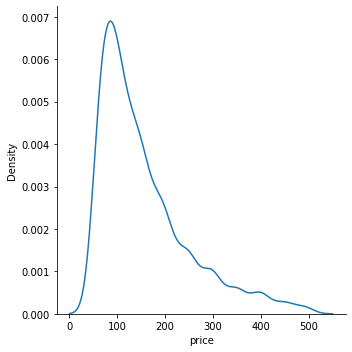

In [ ]:
df_price = df.filter((df.price > 50) & (df.price < 500)).toPandas()
sns.displot(df_price, x = 'price', kind='kde', bw_adjust=2);

In [ ]:
df_explore.groupby('room_type').count().show()

+--------------------+------+
|           room_type| count|
+--------------------+------+
|         Shared room|  4015|
|             Burbank|     1|
|          Hotel room|  1899|
|Unincorporated Areas|     1|
|     Entire home/apt|153796|
|   City of Henderson|     1|
|        Private room| 65569|
+--------------------+------+



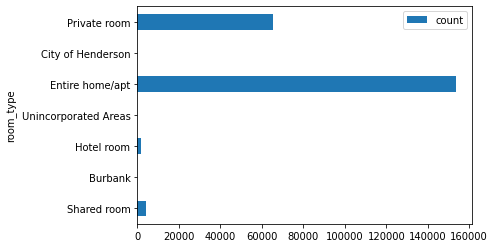

In [ ]:
df_type = df_explore.groupby('room_type').count().toPandas()
df_type.plot.barh('room_type');

In [ ]:
df_explore.groupby('city').count().show(10)

+--------------+-----+
|          city|count|
+--------------+-----+
|        Hawaii|22369|
|       Oakland| 3201|
|Broward County|10814|
|   Los Angeles|31386|
|     Cambridge| 1029|
|     Nashville| 6126|
|     San Diego|12353|
| San Francisco| 7041|
|      Portland| 4264|
|      Columbus| 1404|
+--------------+-----+
only showing top 10 rows



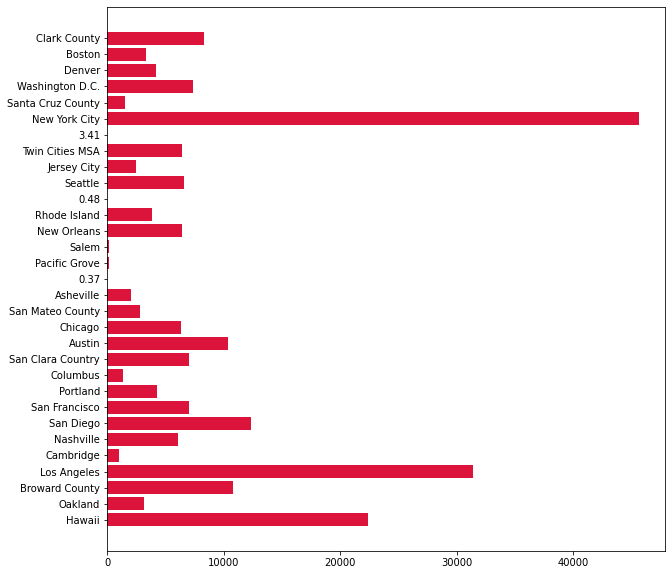

In [ ]:
df_city_graph = df_explore.groupby('city').count().toPandas()
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(df_city_graph.iloc[:,0],df_city_graph.iloc[:,1],color='crimson')
plt.show();

In [ ]:
df.filter(df['price'] > 50).select('room_type','price','city').show()

+---------------+-----+---------+
|      room_type|price|     city|
+---------------+-----+---------+
|   Private room| 60.0|Asheville|
|Entire home/apt|470.0|Asheville|
|Entire home/apt| 75.0|Asheville|
|Entire home/apt| 90.0|Asheville|
|   Private room|125.0|Asheville|
|Entire home/apt|134.0|Asheville|
|   Private room| 65.0|Asheville|
|Entire home/apt| 71.0|Asheville|
|Entire home/apt|289.0|Asheville|
|Entire home/apt| 78.0|Asheville|
|Entire home/apt|125.0|Asheville|
|Entire home/apt|126.0|Asheville|
|Entire home/apt|118.0|Asheville|
|   Private room| 85.0|Asheville|
|Entire home/apt| 97.0|Asheville|
|Entire home/apt| 74.0|Asheville|
|Entire home/apt|160.0|Asheville|
|Entire home/apt|150.0|Asheville|
|Entire home/apt| 91.0|Asheville|
|   Private room| 52.0|Asheville|
+---------------+-----+---------+
only showing top 20 rows



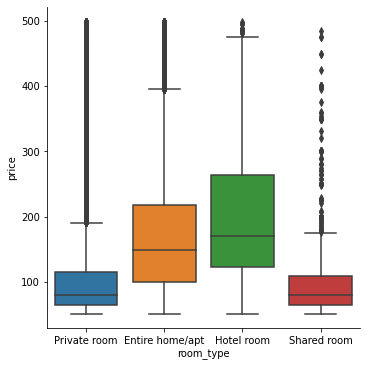

In [ ]:
df_type_price = df.filter((df.price > 50) & (df.price < 500)).select('room_type','price').toPandas()
sns.catplot(x="room_type", y="price", kind="box", data=df_type_price);

In [ ]:
df.filter(df['room_type'] == 'Private room').select('room_type','price','city').show()

+------------+-----+---------+
|   room_type|price|     city|
+------------+-----+---------+
|Private room| 60.0|Asheville|
|Private room|125.0|Asheville|
|Private room| 48.0|Asheville|
|Private room| 65.0|Asheville|
|Private room| 85.0|Asheville|
|Private room| 41.0|Asheville|
|Private room| 52.0|Asheville|
|Private room|169.0|Asheville|
|Private room| 52.0|Asheville|
|Private room| 57.0|Asheville|
|Private room| 65.0|Asheville|
|Private room| 95.0|Asheville|
|Private room| 80.0|Asheville|
|Private room| 85.0|Asheville|
|Private room| 70.0|Asheville|
|Private room|149.0|Asheville|
|Private room| 57.0|Asheville|
|Private room| 81.0|Asheville|
|Private room| 92.0|Asheville|
|Private room| 38.0|Asheville|
+------------+-----+---------+
only showing top 20 rows



In [ ]:
df.filter(df['city'] == 'New York City').groupBy('room_type').count().show()

+---------------+-----+
|      room_type|count|
+---------------+-----+
|    Shared room|  940|
|     Hotel room|  393|
|Entire home/apt|23529|
|   Private room|20767|
+---------------+-----+



In [ ]:
df.filter(df['price'] > 50).groupBy('city').count().show()

+-----------------+-----+
|             city|count|
+-----------------+-----+
|           Hawaii|21726|
|          Oakland| 2727|
|   Broward County| 9436|
|      Los Angeles|26951|
|        Cambridge|  961|
|        Nashville| 5823|
|        San Diego|11215|
|    San Francisco| 6612|
|         Portland| 3770|
|         Columbus| 1100|
|San Clara Country| 5915|
|           Austin| 9252|
|          Chicago| 5289|
| San Mateo County| 2573|
|        Asheville| 1927|
|    Pacific Grove|  172|
|            Salem|  153|
|      New Orleans| 6085|
|     Rhode Island| 3632|
|          Seattle| 5942|
+-----------------+-----+
only showing top 20 rows



In [ ]:
df_explore.select(countDistinct('room_type')).show()

+-------------------------+
|count(DISTINCT room_type)|
+-------------------------+
|                        7|
+-------------------------+



In [ ]:
df_explore.select(countDistinct('city')).show()

+--------------------+
|count(DISTINCT city)|
+--------------------+
|                  31|
+--------------------+



In [ ]:
df_explore.select(countDistinct('neighbourhood')).show()

+-----------------------------+
|count(DISTINCT neighbourhood)|
+-----------------------------+
|                         1452|
+-----------------------------+



In [ ]:
df_explore.agg({'Price':'avg'}).show()

+------------------+
|        avg(Price)|
+------------------+
|219.92446948464593|
+------------------+




# Regression Modelling


Linear Regression model is one the oldest and widely used machine learning approach which assumes a relationship between dependent and independent variables. 

The goal of our project is to predict the Airbnb prices by the given features. Based on the above exploration and understanding on the dataset, some features are meaningless. So we will use some features for prediction. 

In [ ]:
model_df = df

In [ ]:
model_df = model_df.drop('id','name','host_id','host_name','latitude','longitude')

In [ ]:
model_df.printSchema()

root
 |-- neighbourhood: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: double (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: double (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)
 |-- city: string (nullable = true)



For our linear regression model we need to import some modules from Pyspark i.e. StringIndexer, Vector Assembler and Linear Regression. StringIndexer is used for handling categorical data. We use it to convert columns with string values to numeric values. Vector Assembler is a transformer that assembles all the features into one vector from multiple columns that contain type double. 

In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
# from pyspark.ml import Pipeline
from pyspark.ml.feature import StandardScaler

In [ ]:
s = ['neighbourhood','room_type','city']

In [ ]:
strIndexer_1 = StringIndexer(inputCol = 'neighbourhood' , outputCol= 'neighbourhood_index').fit(model_df)
model_df_nh = strIndexer_1.transform(model_df)
model_df_nh.show()


+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+
|neighbourhood|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|neighbourhood_index|
+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+
|        28804|   Private room| 60.0|             1|            138.0|             1.14|                             1|               0|Asheville|              198.0|
|        28801|Entire home/apt|470.0|             1|            114.0|             1.03|                            11|             288|Asheville|               79.0|
|        28801|Entire home/apt| 75.0|            30|             89.0|             0.81|                             2|             298|Asheville|               79.0

In [ ]:
strIndexer_2 = StringIndexer(inputCol = 'room_type' , outputCol= 'room_type_index').fit(model_df_nh)
model_df_rt = strIndexer_2.transform(model_df_nh)
model_df_rt.show()

+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+---------------+
|neighbourhood|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|neighbourhood_index|room_type_index|
+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+---------------+
|        28804|   Private room| 60.0|             1|            138.0|             1.14|                             1|               0|Asheville|              198.0|            1.0|
|        28801|Entire home/apt|470.0|             1|            114.0|             1.03|                            11|             288|Asheville|               79.0|            0.0|
|        28801|Entire home/apt| 75.0|            30|             89.0|             0.

In [ ]:
strIndexer_3 = StringIndexer(inputCol = 'city' , outputCol= 'city_index').fit(model_df_rt)
model_df_final = strIndexer_3.transform(model_df_rt)
model_df_final.show()

+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+---------------+----------+
|neighbourhood|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|neighbourhood_index|room_type_index|city_index|
+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+---------------+----------+
|        28804|   Private room| 60.0|             1|            138.0|             1.14|                             1|               0|Asheville|              198.0|            1.0|      22.0|
|        28801|Entire home/apt|470.0|             1|            114.0|             1.03|                            11|             288|Asheville|               79.0|            0.0|      22.0|
|        28801|Entire home/apt

In [ ]:
model_df_final.printSchema()

root
 |-- neighbourhood: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: double (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: double (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- neighbourhood_index: double (nullable = false)
 |-- room_type_index: double (nullable = false)
 |-- city_index: double (nullable = false)



In [ ]:
from pyspark.ml.feature import Imputer

In [ ]:
n = ['price','minimum_nights','number_of_reviews','reviews_per_month', 'calculated_host_listings_count',
     'availability_365']

In [ ]:
n_imputed = [var + '_imputed' for var in n]
imputer = Imputer(inputCols=n, outputCols = n_imputed)
model_df_final = imputer.fit(model_df_final).transform(model_df_final)

In [ ]:
model_df_final.printSchema()

root
 |-- neighbourhood: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: double (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: double (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- neighbourhood_index: double (nullable = false)
 |-- room_type_index: double (nullable = false)
 |-- city_index: double (nullable = false)
 |-- price_imputed: double (nullable = true)
 |-- calculated_host_listings_count_imputed: integer (nullable = true)
 |-- number_of_reviews_imputed: double (nullable = true)
 |-- reviews_per_month_imputed: double (nullable = true)
 |-- minimum_nights_imputed: integer (nullable = true)
 |-- availability_365_imputed: integer (nullable = true)



In [ ]:
model_df_final.show()

+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+---------------+----------+-------------+--------------------------------------+-------------------------+-------------------------+----------------------+------------------------+
|neighbourhood|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|neighbourhood_index|room_type_index|city_index|price_imputed|calculated_host_listings_count_imputed|number_of_reviews_imputed|reviews_per_month_imputed|minimum_nights_imputed|availability_365_imputed|
+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+---------------+----------+-------------+--------------------------------------+-------------------------+-------------------------+--------

In [ ]:
featuresUsed = ['minimum_nights_imputed','number_of_reviews_imputed','reviews_per_month_imputed','calculated_host_listings_count_imputed',
                'availability_365_imputed','neighbourhood_index','room_type_index','city_index']

In [ ]:
# Put the features to be trained into a vector
assembler = VectorAssembler(inputCols=featuresUsed, outputCol='features_unscaled')
data = assembler.transform(model_df_final)

In [ ]:
data.show()

+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+---------------+----------+-------------+--------------------------------------+-------------------------+-------------------------+----------------------+------------------------+--------------------+
|neighbourhood|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|neighbourhood_index|room_type_index|city_index|price_imputed|calculated_host_listings_count_imputed|number_of_reviews_imputed|reviews_per_month_imputed|minimum_nights_imputed|availability_365_imputed|   features_unscaled|
+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+---------------+----------+-------------+--------------------------------------+------------------

In [ ]:
# Use the StandardScaler to scale the data
scaler = StandardScaler(inputCol = 'features_unscaled', outputCol='features', withStd=True)
scalerModel = scaler.fit(data)
data = scalerModel.transform(data)

In [ ]:
#Split training, validation and testing datasets
train, validation, test = data.randomSplit([0.7, 0.2, 0.1], seed=42)

Here, 'features' are the input features from all the columns and 'price' is the target column.
We split the training, validation and testing data to our dataset (0.7, 0.2 and 0.1 in this case).

# Linear Regression

In [ ]:
regressor = LinearRegression(featuresCol = 'features', labelCol = 'price')

#Learn to fit the model from training set
regressor = regressor.fit(train)

#To predict the prices on validation set
pred = regressor.evaluate(validation)

#Predict the model
pred.predictions.show()

+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+---------------+----------+-------------+--------------------------------------+-------------------------+-------------------------+----------------------+------------------------+--------------------+--------------------+------------------+
|neighbourhood|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|neighbourhood_index|room_type_index|city_index|price_imputed|calculated_host_listings_count_imputed|number_of_reviews_imputed|reviews_per_month_imputed|minimum_nights_imputed|availability_365_imputed|   features_unscaled|            features|        prediction|
+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+---------------+--

We can also print the coefficient and intercept of the regression model:

In [ ]:
#coefficient of the regression model
coeff = regressor.coefficients

#X and Y intercept
intr = regressor.intercept

print ("The coefficient of the model is : %a" %coeff)
print ("The Intercept of the model is : %f" %intr)


The coefficient of the model is : DenseVector([-54387.6815, -56.1539, 19.9217, 8.9124, 18.5706, -19.8463, -56.3536, 6.6805])
The Intercept of the model is : 250.752936


Once we are done with the basic linear regression operation, we can go a bit further and analyze our model statistically by importing RegressionEvaluator module from Pyspark.

In [ ]:
eval = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

RMSE: 121959.277
MSE: 14874065252.580
MAE: 749.893
r2: -38985.579


# Decision Tree Regression

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'price')
dt_model = dt.fit(train)
dt_predictions = dt_model.transform(validation)

In [ ]:
dt_predictions.show()

+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+---------------+----------+-------------+--------------------------------------+-------------------------+-------------------------+----------------------+------------------------+--------------------+--------------------+------------------+
|neighbourhood|      room_type|price|minimum_nights|number_of_reviews|reviews_per_month|calculated_host_listings_count|availability_365|     city|neighbourhood_index|room_type_index|city_index|price_imputed|calculated_host_listings_count_imputed|number_of_reviews_imputed|reviews_per_month_imputed|minimum_nights_imputed|availability_365_imputed|   features_unscaled|            features|        prediction|
+-------------+---------------+-----+--------------+-----------------+-----------------+------------------------------+----------------+---------+-------------------+---------------+--

In [ ]:
dt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")
# Root Mean Square Error
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on validation data: %g" % rmse)
# Mean Square Error
mse = dt_evaluator.evaluate(dt_predictions,{dt_evaluator.metricName: "mse"})
print("Mean Square Error (MSE) on validation data: %.3f" % mse)
# Mean Absolute Error
mae = dt_evaluator.evaluate(dt_predictions, {dt_evaluator.metricName: "mae"})
print("MAE: %.3f" % mae)
# r2 - coefficient of determination
r2 = dt_evaluator.evaluate(dt_predictions, {dt_evaluator.metricName: "r2"})
print("r2: %.3f" %r2)

Root Mean Squared Error (RMSE) on validation data: 601.909
Mean Square Error (MSE) on validation data: 362294.006
MAE: 162.873
r2: 0.050


# Gradient-boosted Tree Regression

In [ ]:
from pyspark.ml.regression import GBTRegressor

In [ ]:
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'price', maxIter=10)
gbt_model = gbt.fit(train)
gbt_predictions = gbt_model.transform(validation)

In [ ]:
gbt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")
# Root Mean Square Error
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on validation data: %g" % rmse)
# Mean Square Error
mse = gbt_evaluator.evaluate(gbt_predictions,{gbt_evaluator.metricName: "mse"})
print("Mean Square Error (MSE) on validation data: %.3f" % mse)
# Mean Absolute Error
mae = gbt_evaluator.evaluate(gbt_predictions, {gbt_evaluator.metricName: "mae"})
print("MAE: %.3f" % mae)
# r2 - coefficient of determination
r2 = gbt_evaluator.evaluate(gbt_predictions, {gbt_evaluator.metricName: "r2"})
print("r2: %.3f" %r2)

Root Mean Squared Error (RMSE) on validation data: 585.378
Mean Square Error (MSE) on validation data: 342667.031
MAE: 156.235
r2: 0.102


Based on three regression models above, gradient-boosted tree regression has the best performance, now we are using this model to predict testing dataset.

In [ ]:
test_pred = gbt_model.transform(test)

In [ ]:
gbt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(test_pred)
print("Root Mean Squared Error (RMSE) on validation data: %g" % rmse)

mse = gbt_evaluator.evaluate(test_pred,{gbt_evaluator.metricName: "mse"})
print("Mean Square Error (MSE) on validation data: %.3f" % mse)

mae = gbt_evaluator.evaluate(test_pred, {gbt_evaluator.metricName: "mae"})
print("MAE: %.3f" % mae)

r2 = gbt_evaluator.evaluate(test_pred, {gbt_evaluator.metricName: "r2"})
print("r2: %.3f" %r2)

Root Mean Squared Error (RMSE) on validation data: 517.378
Mean Square Error (MSE) on validation data: 267680.224
MAE: 150.278
r2: 0.101
